In [1]:
# all import statements 

import logging
logger = logging.getLogger()
logger.setLevel('INFO')
import matplotlib
matplotlib.use('nbagg')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 20)
import networkx as nx
from sklearn.preprocessing import minmax_scale

# importing own modules
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir) + "/pm"
sys.path.insert(0,parentdir)

import comment_thread as ct
import author_network as an
import multi_comment_thread as mct
from notebook_helper.process_data import *
from notebook_helper.access_funs import *
from plotting.threads import *
from plotting.network import *
from plotting.overview import *
from plotting.heatmap import *
from plotting.components import *

sns.set_style('white')

%load_ext autoreload
%autoreload 2

In [2]:
PM_FRAME = concatenate_project_dfs(
            process_pms(*range(1, 14)))
ALL_AUTHORS = set.union(*PM_FRAME['all threads', 'authors'].tolist())

<div id="div-comment-115409">
<div class="comment-author vcard">
<img alt="" class="avatar avatar-32" height="32" src="https://1.gravatar.com/avatar/a23b9df554f5ee2e60fdc13645e4c50d?s=32&amp;d=identicon&amp;r=G" width="32"/> <p>Jeff Kahn mentioned to me the beautiful “<a href="http://www.openproblemgarden.org/op/wide_partition_conjecture" rel="nofollow">Wide Partition Conjecture</a>” from the paper: T. Chow, C.K. Fan, M.X. Goemans and J. Vondrak, <cite>Wide Partitions, Latin Tableaux, and Rota’s Basis Conjecture</cite>, Advances in Applied Mathematics, 31, 334–358, 2003. <a href="http://math.mit.edu/~goemans/PAPERS/wide.pdf" rel="nofollow">pdf</a> . (I think this conjecture might be interesting also in the Tverberg context we mensioned above.) Perhaps, Tim, you can explain and motivate this conjecture and its relation to Rota’s conjecture?</p>
<div class="pd-rating" id="pd_rating_holder_133283_comm_115409"></div> <p><cite>Comment by <span class="fn"><a class="url" href="http://www.ma.h

Rota’s Basis Conjecture: Polymath 12, post 3
Rota‘s Basis Conjecture: Poltmath 12, post 3



# 1. Getting an idea of the sizes of the projects

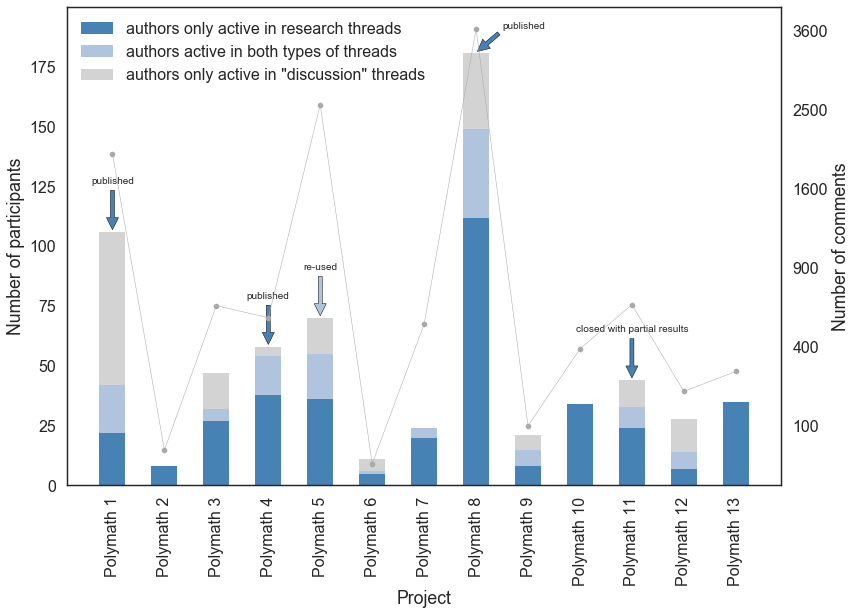

In [3]:
plot_overview(PM_FRAME, annotate=True)

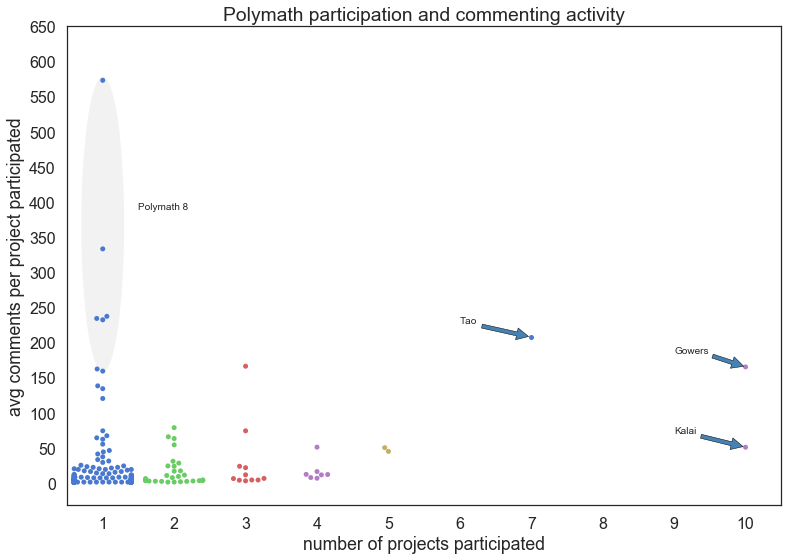

In [4]:
project_data = plot_scatter_author_activity_projects(PM_FRAME, ALL_AUTHORS)

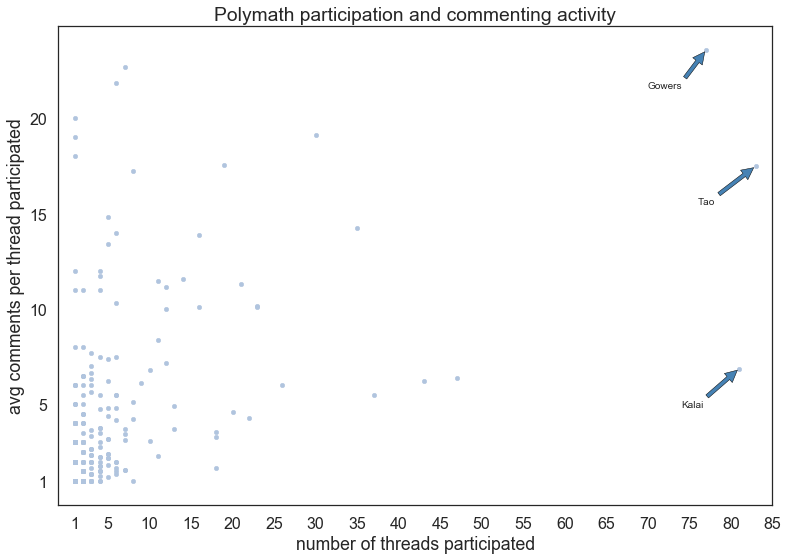

In [5]:
thread_data = plot_scatter_author_activity_threads(PM_FRAME, ALL_AUTHORS)

# 2. Heatmaps to look more in detail

In [6]:
# assembling info needed to create the heatmaps (all authors who participated to 2 projects)
author_project_all, indices_all, select_2_all, title_all = project_participation_evolution(
    PM_FRAME, ALL_AUTHORS, research_only=False)

author_project_res, indices_res, select_2_res, title_res = project_participation_evolution(
    PM_FRAME, ALL_AUTHORS, research_only=True)


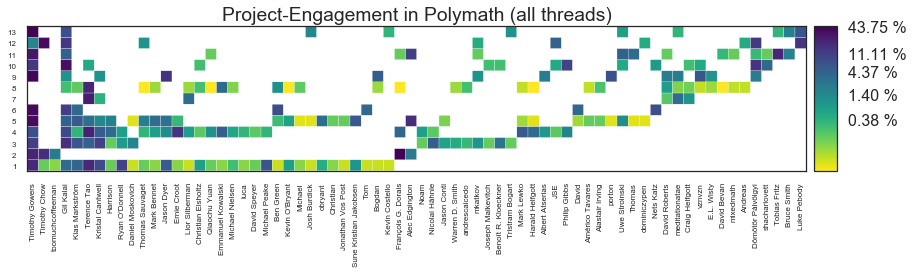

In [7]:
authors_2_all = [author for author, bool in select_2_all.items() if bool]
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2_all,
                              thread_level=False, cluster_projects=False,
                              cluster_authors=False,
                              binary=False,
                              scale_data=True),
             log=True)

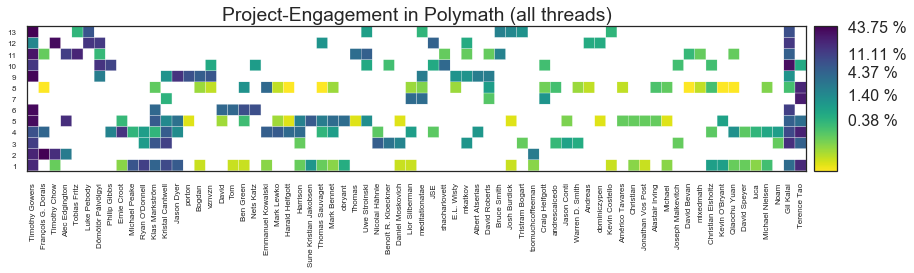

In [8]:
authors_2_all = sorted(authors_2_all)
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2_all,
                              thread_level=False, cluster_projects=False,
                              binary=False,
                              scale_data=True),
             log=True)

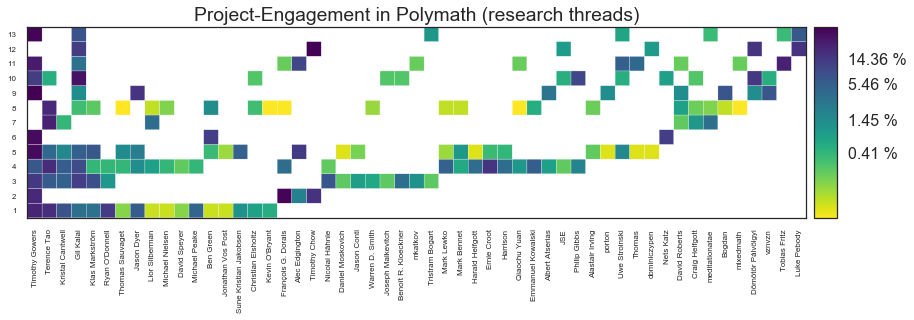

In [9]:
authors_2_res = [author for author, bool in select_2_res.items() if bool]
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2_res,
                              thread_level=False,
                              thread_type='research threads',
                              cluster_projects=False,
                              cluster_authors=False,
                              binary=False,
                              scale_data=True),
             log=True)

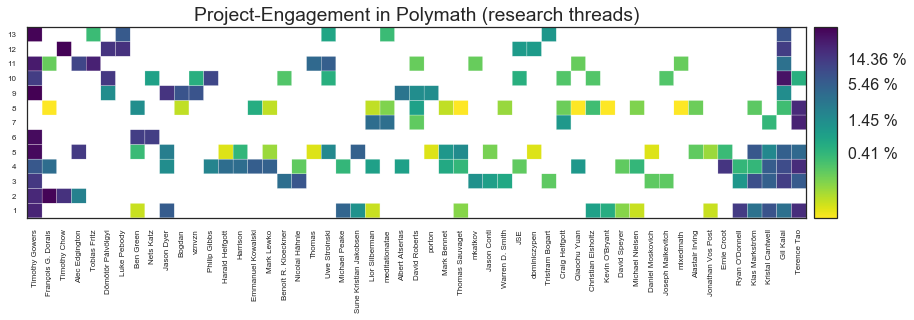

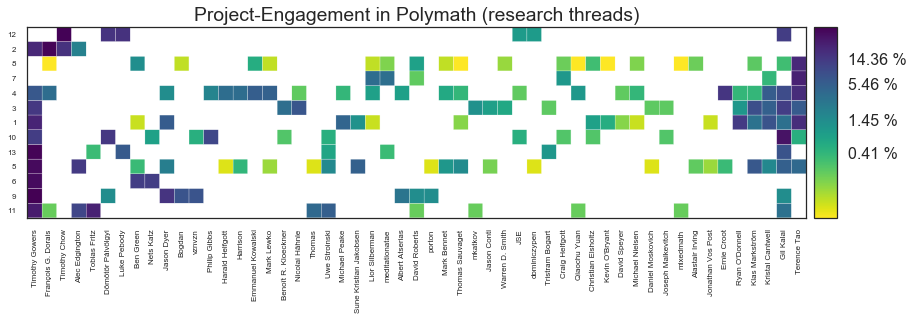

In [10]:
authors_2_res = sorted(authors_2_res)
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2_res,
                              thread_level=False,
                              thread_type='research threads',
                              cluster_projects=False,
                              binary=False,
                              scale_data=True),
             log=True)
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2_res,
                              thread_level=False,
                              thread_type='research threads',
                              cluster_projects=True,
                              binary=False,
                              scale_data=True),
             log=True)

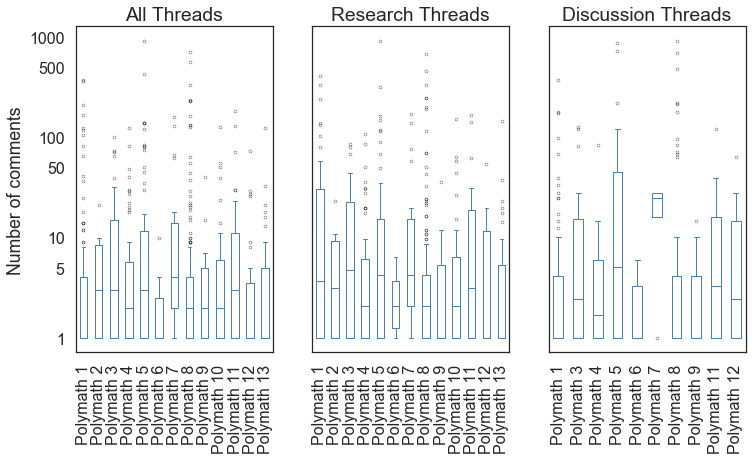

In [11]:
plot_comments_boxplot(PM_FRAME)